<a href="https://colab.research.google.com/github/igor531205/ml-course/blob/Task3/homework/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пушкарев Игорь Игоревич. Группа 23.М08-мм.
## Задача 3. Сравнение методов классификации.

## Разведочный анализ данных - Exploratory Data Analysis (EDA)

1.   ✅ Взять данные для предсказания заболеваний сердца [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/heart_disease) (целевой признак для предсказания --- target). Демо блокнот с анализом этих данных можно найти [тут](https://github.com/rustam-azimov/ml-course/blob/main/practice/practice07_knn_nb/practice07_part02_classification_heart_disease_demo.ipynb).

2.   ✅ Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

3.   ✅ Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.

4.   ✅ При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [ ]:
from google.colab import files

link = 'heart.csv'
uploaded = files.upload_file(link) # Загружаем файл heart.csv

Saved heart.csv to /content/heart.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

In [ ]:
df=pd.read_csv(link, index_col=False) # Считываем данные

pd.options.display.max_columns = None # Отключаем ограничение в отображении столбцов

df.head(n=5) # Выводим 5 строк

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Описание датасета:

*   age - age in years
*   sex - (1 = male; 0 = female)
*   cp - chest pain type
*   trestbps - resting blood pressure (in mm Hg on admission to the hospital)
*   chol - serum cholestoral in mg/dl
*   fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
*   restecg - resting electrocardiographic results
*   thalach - maximum heart rate achieved
*   exang - exercise induced angina (1 = yes; 0 = no)
*   oldpeak - ST depression induced by exercise relative to rest
*   slope - the slope of the peak exercise ST segment
*   ca - number of major vessels (0-3) colored by flourosopy
*   thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
*   target - have disease or not (1=yes, 0=no)

Целевой признак столбец **target**

In [ ]:
df.columns # Выведем все столбцы

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.shape # Размеры таблицы: (кол-во строк, кол-во столбцов)

(1025, 14)

In [ ]:
df.describe() # Основная информация по признакам

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info() # Тип признаков и количество значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.nunique() # Проверяем количество уникальных значений

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
df.isnull().sum() # Проверяем общее количество пропущенных значений

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


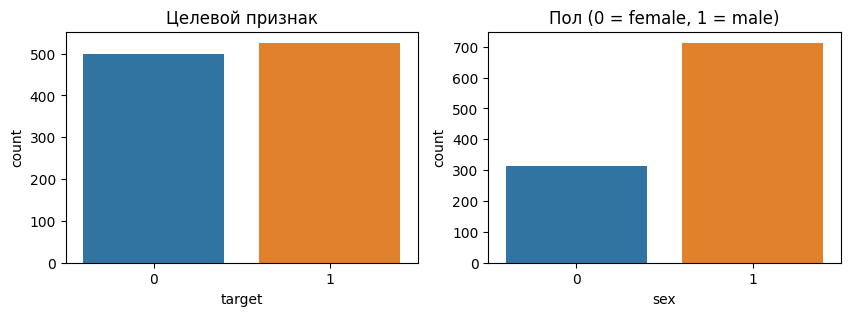

In [ ]:
# Графическое отображение категориальных признаков
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

sns.countplot(x=df['target'], ax=axes[0])
axes[0].set_title('Целевой признак')

sns.countplot(x=df['sex'], ax=axes[1])
axes[1].set_title('Пол (0 = female, 1 = male)')

plt.show()

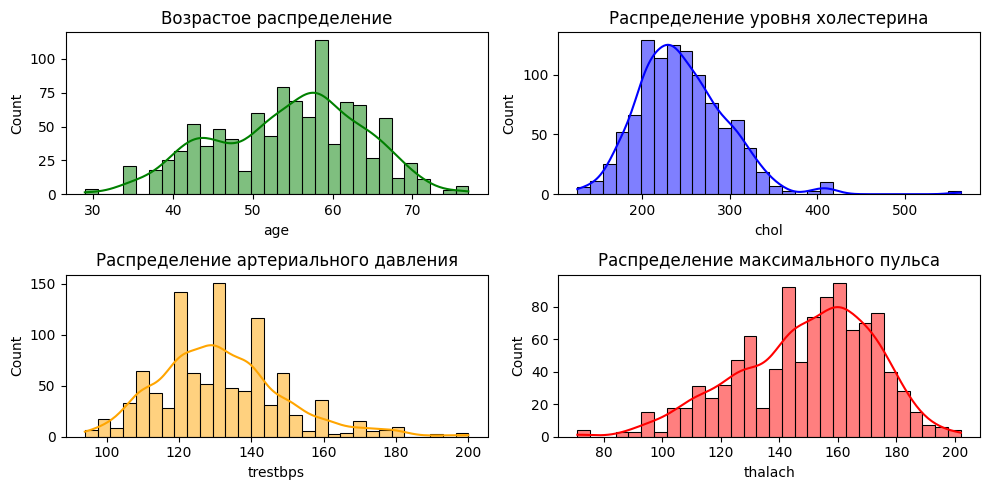

In [ ]:
# Графическое отображение количественных признаков
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

sns.histplot(df['age'], bins=30, ax=axes[0, 0], kde=True, color='green')
axes[0, 0].set_title('Возрастое распределение')

sns.histplot(df['chol'], bins=30, ax=axes[0, 1], kde=True, color='blue')
axes[0, 1].set_title('Распределение уровня холестерина')

sns.histplot(df['trestbps'], bins=30, ax=axes[1, 0], kde=True, color='orange')
axes[1, 0].set_title('Распределение артериального давления')

sns.histplot(df['thalach'], bins=30, ax=axes[1, 1], kde=True, color='red')
axes[1, 1].set_title('Распределение максимального пульса')

plt.tight_layout()
plt.show()

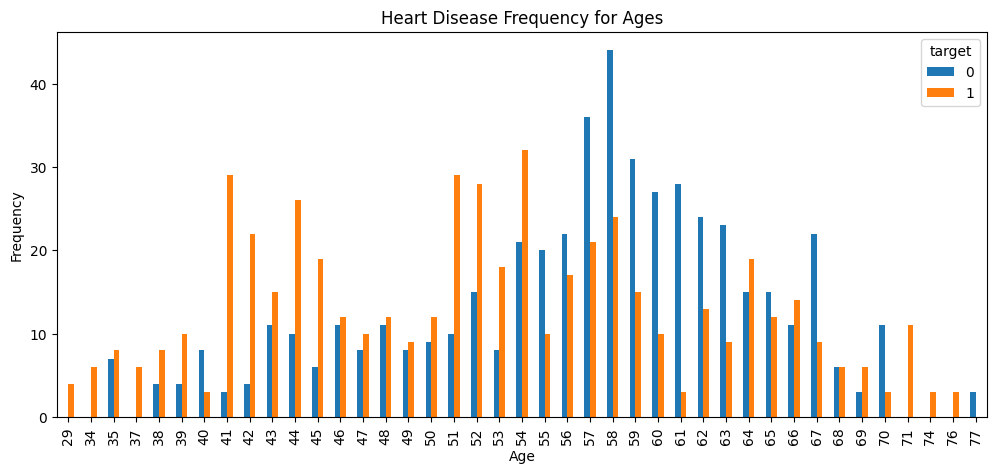

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar", figsize=(12, 5))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

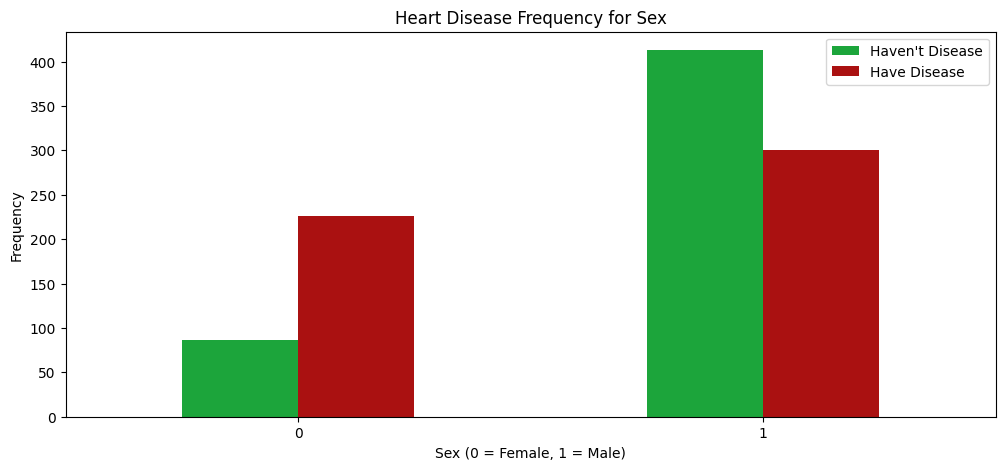

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar", figsize=(12, 5), color=['#1CA53B', '#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

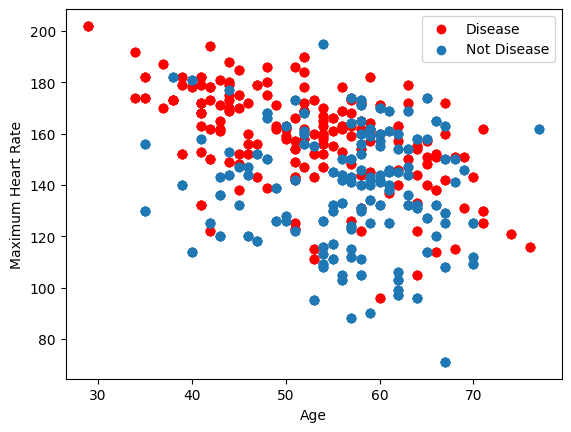

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

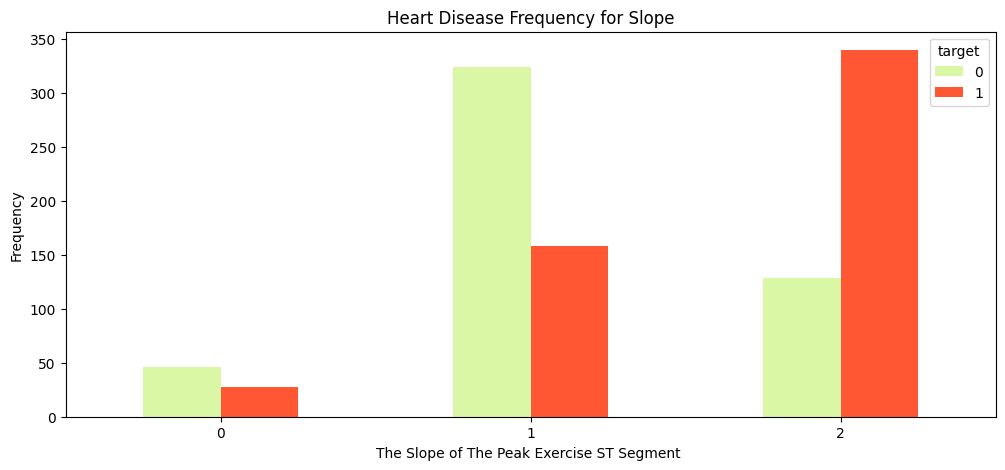

In [ ]:
pd.crosstab(df.slope,df.target).plot(kind="bar", figsize=(12, 5), color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

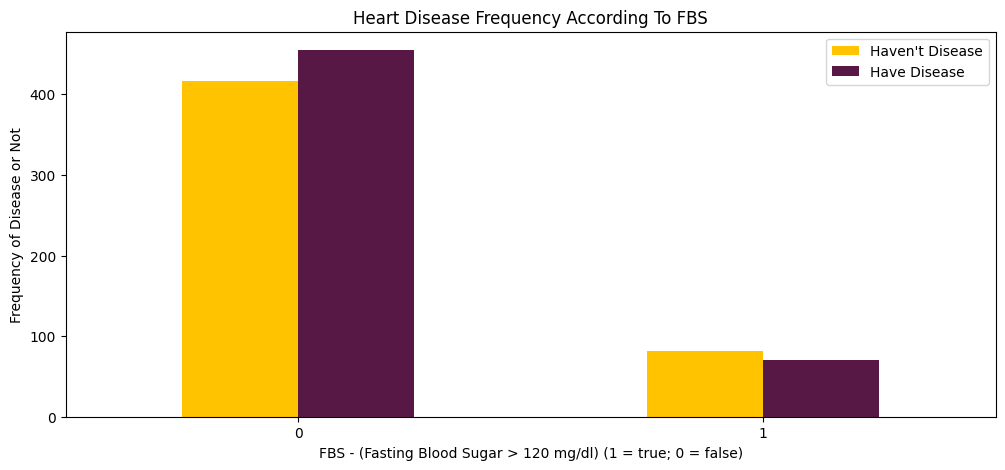

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar", figsize=(12, 5), color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

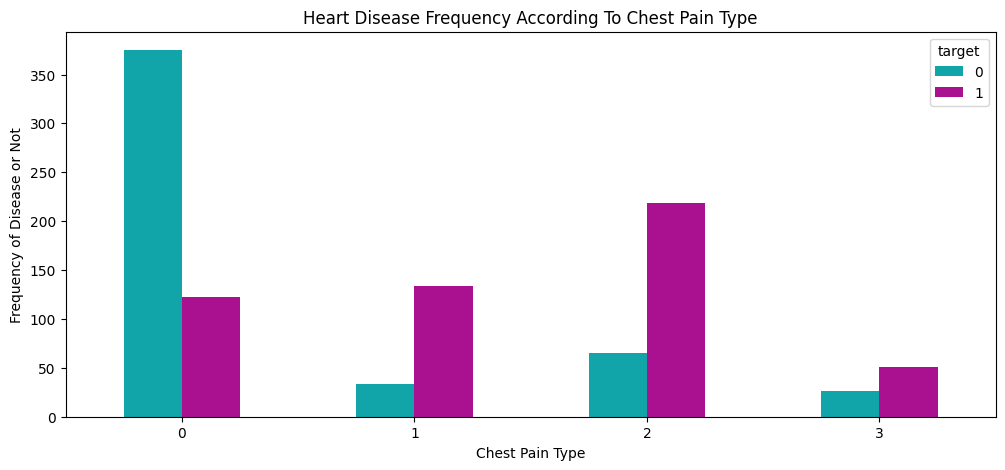

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(12, 5), color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

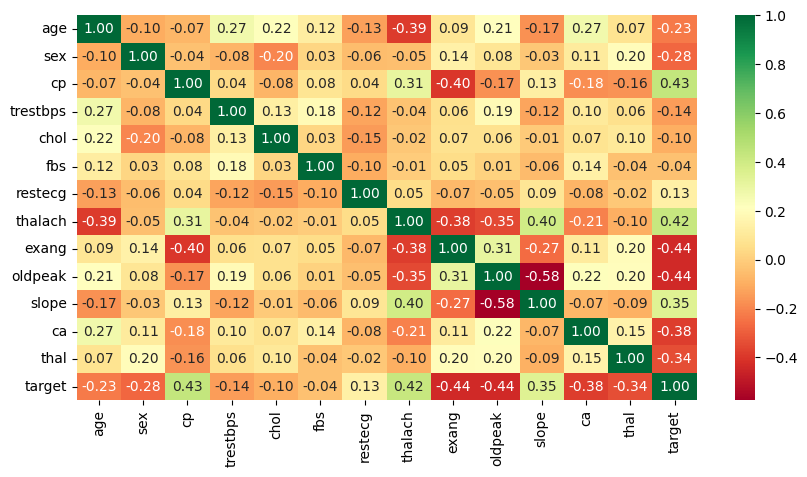

In [ ]:
# Корреляция признаков
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Целевой признак показывает заметную корреляцию с 'cp' 'thalach' 'slope'. Они могут играть важную роль в прогнозировании сердечно-сосудистых заболеваний.

### Преобразование категориальных признаков

In [ ]:
# Закодируем категориальные признаки cp, thal и slope.
cp_dum = pd.get_dummies(df['cp'], prefix = "cp")
thal_dum = pd.get_dummies(df['thal'], prefix = "thal")
slope_dum = pd.get_dummies(df['slope'], prefix = "slope")

frames = [df, cp_dum, thal_dum, slope_dum]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,0,1,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,0,1,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,0,1,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,0,1,0,0,0,0,0,1,0,0,1,0


## Classification


1.   ✅ Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.

6.   ✅ Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.

7.   ✅ Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).

8.   ✅ Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.

9.   ✅ (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.

10.  ✅ (+3 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [ ]:
# Самостоятельная реализация logistic regression, с возможностью настройки гиперпараметров
from sklearn.base import BaseEstimator, ClassifierMixin

class LogisticRegressionCustom(BaseEstimator, ClassifierMixin):
    """
    Custom implementation of Logistic Regression.
    """

    def __init__(self, lr=0.01, num_iter=500, add_intercept=True):
        """
        Initialize the logistic regression model.
        :param lr: Learning rate.
        :param num_iter: Number of iterations for the optimization algorithm.
        :param add_intercept: If True, an intercept term will be added to the model.
        """
        self.lr = lr
        self.num_iter = num_iter
        self.add_intercept = add_intercept
        self.theta = None
        self.coef_ = None

    def __add_intercept(self, X):
        """
        Add an intercept term to the data.
        """
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        """
        Compute the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))

    def __loss(self, h, y):
        """
        Compute the loss function.
        """
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        """
        Fit the model to the data.
        """
        X = X.copy()
        y = y.copy()

        if self.add_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

        self.coef_ = self.theta[1:]

    def predict_proba(self, X):
        """
        Predict class probabilities.
        """
        if self.add_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        """
        Predict class labels.
        """
        X = X.copy()
        return self.predict_proba(X).round()

In [ ]:
# Самостоятельная реализация svm, с возможностью настройки гиперпараметров
from scipy.optimize import minimize

class SVMCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, kernel='linear'):
        self.C = C
        self.kernel = kernel
        self.coef_ = None
        self.intercept_ = None
        self.support_vectors_ = None

    def fit(self, X, y):
        X = X.copy()
        y = y.copy()

        n_samples, n_features = X.shape

        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        def loss_function(w):
            hinge_loss = np.sum(np.maximum(0, 1 - y * (np.dot(X, w[:-1]) + w[-1])))
            return 0.5 * np.dot(w[:-1], w[:-1]) + self.C * hinge_loss

        initial_w = np.zeros(n_features + 1)
        result = minimize(loss_function, initial_w, method='nelder-mead')

        self.coef_ = result.x[:-1]
        self.intercept_ = result.x[-1]

    def predict(self, X):
        X = X.copy()
        predictions = np.dot(X, self.coef_) + self.intercept_
        return (predictions > 0).astype(int)

In [ ]:
# Разбиение данных с использованием train_test_split и масштабирование
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['target']
X = df.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((717, 21), (308, 21), (717,), (308,))

In [ ]:
# Библиотечные реализации logistic regression, svm, knn, naive bayes, decision tree.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['rbf', 'linear']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 7, 9],
            'min_samples_split': [2, 4, 6]
        }
    },
    'Logistic Regression Custom': {
        'model': LogisticRegressionCustom(),
        'params': {
            'lr': [0.001, 0.01, 0.1, 1],
            'num_iter': [100, 500, 1000]
        }
    },
    'SVM Custom': {
        'model': SVMCustom(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'kernel': ['linear']
        }
    }
}

In [ ]:
# Поиск по сетке с помощью GridSearchCV и обучение моделей.
from sklearn.model_selection import GridSearchCV

tuned_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    tuned_models[name] = grid_search.best_estimator_
    preds = tuned_models[name].predict(X_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} best_estimator: {tuned_models[name]}')

Logistic Regression accuracy: 0.8084415584415584
Logistic Regression best_estimator: LogisticRegression(C=10, solver='liblinear')
SVM accuracy: 0.9805194805194806
SVM best_estimator: SVC(C=100)
KNN accuracy: 0.9318181818181818
KNN best_estimator: KNeighborsClassifier(n_neighbors=3)
Naive Bayes accuracy: 0.6688311688311688
Naive Bayes best_estimator: GaussianNB()
Decision Tree accuracy: 0.974025974025974
Decision Tree best_estimator: DecisionTreeClassifier(max_depth=9)
Logistic Regression Custom accuracy: 0.8084415584415584
Logistic Regression Custom best_estimator: LogisticRegressionCustom(lr=1, num_iter=100)
SVM Custom accuracy: 0.6915584415584416
SVM Custom best_estimator: SVMCustom(C=10)


Logistic Regression optimal number of features: 21
Logistic Regression selected features: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']

Decision Tree optimal number of features: 11
Decision Tree selected features: ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'cp_0', 'thal_1', 'thal_2', 'slope_2']

Logistic Regression Custom optimal number of features: 21
Logistic Regression Custom selected features: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1', 'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2']



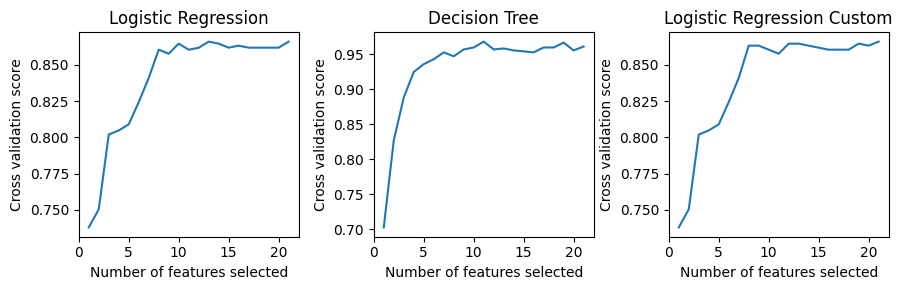

In [ ]:
# Выбор оптимального количества признаков кросс-валидацией с помощью RFECV
from sklearn.feature_selection import RFECV

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes = axes.flatten()

for i, name in enumerate(['Logistic Regression', 'Decision Tree', 'Logistic Regression Custom']):
    rfecv = RFECV(estimator=tuned_models[name], step=1, cv=5, scoring='accuracy')
    rfecv.fit(X_train_scaled, y_train)

    print(f'{name} optimal number of features: {rfecv.n_features_}')
    print(f'{name} selected features: {list(X_train.columns[rfecv.support_])}\n')

    axes[i].plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Number of features selected')
    axes[i].set_ylabel('Cross validation score')

plt.tight_layout()
plt.show()

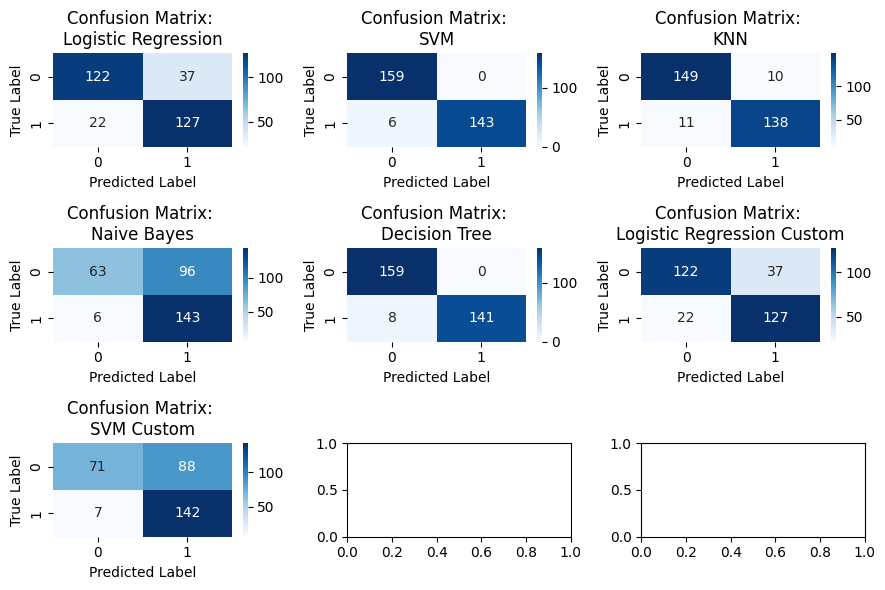

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 6))
axes = axes.flatten()

for i, (model_name, model) in enumerate(list(tuned_models.items())):

    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: \n{model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

Лучший результат по прогнозированию заболеваний сердца показала библиотечная реализация 'SVM'.

*Скачиваем* [mindfactory_done.csv](https://www.kaggle.com/datasets/emilrueh/laptops-and-notebooks-from-2020-2023/?select=mindfactory_done.csv)

In [ ]:
link = 'mindfactory_done.csv'
uploaded = files.upload_file(link) # Загружаем файл mindfactory_done.csv

Saved mindfactory_done.csv to /content/mindfactory_done.csv


In [ ]:
df=pd.read_csv(link, index_col=False) # Считываем данные

pd.options.display.max_columns = None # Отключаем ограничение в отображении столбцов

df.head(n=3) # Выводим 5 строк

,name,price_eur,display_inch,display_cm,display_resolution,display_ratio,weight_kg,height_mm,width_mm,depth_mm,operating_system,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_life_h,battery_capacity_wh,psu_watts,audio_system,speakers_count,has_touchscreen,keyboard_backlit,keyboard_numpad,has_webcam,has_bluetooth,bluetooth_version,wifi_standard,product_ean,product_sku,release_year,category
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,2560x1600,16:9,1.29,16.1,304.1,212.4,macOS Big Sur,M1,8.0,Apple GPU,NaN,256.0,SSD,18.0,49.9,30.0,Dolby Atmos,2.0,False,True,False,True,True,5.0,Wi-Fi 6 (802.11ax),1.942521e+11,MGN63D/A,2020.0,Notebooks
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,3840x2160,16:9,2.80,20.1,397.6,283.5,Windows 11 Home,i9-13900H,64.0,Intel Iris Xe Graphics,NVIDIA GeForce RTX 4090,4.0,SSD,NaN,99.0,240.0,NaN,2.0,False,True,True,True,True,5.3,Wi-Fi 6E (802.11ax),4.711377e+12,0017P2-013,NaN,Notebooks
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,2880x1800,NaN,1.60,17.9,314.0,227.5,Windows 11 Home,i7-1260P,16.0,Intel Iris Xe Graphics,NaN,1000.0,SSD,NaN,72.0,65.0,NaN,2.0,True,True,False,True,True,5.2,Wi-Fi 6E (802.11ax),4.719073e+12,0014F1-049,NaN,Notebooks


In [ ]:
df.columns # Выведем все столбцы

Index(['name', 'price_eur', 'display_inch', 'display_cm', 'display_resolution',
       'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
       'operating_system', 'cpu_processor', 'ram_memory', 'gpu_integrated',
       'gpu_extra', 'internal_storage_gb', 'storage_type', 'battery_life_h',
       'battery_capacity_wh', 'psu_watts', 'audio_system', 'speakers_count',
       'has_touchscreen', 'keyboard_backlit', 'keyboard_numpad', 'has_webcam',
       'has_bluetooth', 'bluetooth_version', 'wifi_standard', 'product_ean',
       'product_sku', 'release_year', 'category'],
      dtype='object')

In [ ]:
df.shape # Размеры таблицы: (кол-во строк, кол-во столбцов)

(764, 33)

In [ ]:
df.describe() # Основная информация по количественным признакам

,price_eur,display_inch,display_cm,weight_kg,height_mm,width_mm,depth_mm,ram_memory,internal_storage_gb,battery_life_h,battery_capacity_wh,psu_watts,speakers_count,product_ean,release_year
count,764.000000,763.000000,628.000000,616.000000,627.000000,627.000000,627.000000,627.000000,618.000000,210.000000,580.000000,576.000000,538.000000,6.980000e+02,126.000000
mean,1736.678416,14.421232,37.355255,26.080341,21.511053,335.288357,228.200797,20.803828,395.813916,12.749000,60.913534,88.184028,2.503717,2.619275e+12,2022.039683
std,998.432706,2.102272,3.044616,146.797934,33.334493,27.438917,36.440450,79.892368,365.275806,4.517691,14.773935,57.931361,1.036119,2.476135e+12,0.773571
min,276.800000,0.000000,25.600000,1.010000,1.490000,278.200000,4.600000,4.000000,1.000000,4.000000,36.000000,30.000000,1.000000,1.942521e+11,2020.000000
25%,1037.910000,14.000000,35.600000,1.320000,14.700000,312.000000,217.000000,8.000000,128.000000,9.500000,52.500000,65.000000,2.000000,1.968040e+11,2022.000000
50%,1530.730000,14.000000,35.600000,1.540000,17.900000,325.400000,226.900000,16.000000,512.000000,12.000000,57.000000,65.000000,2.000000,4.039407e+12,2022.000000
75%,2105.340000,15.600000,39.600000,1.820000,19.900000,359.000000,245.250000,16.000000,512.000000,17.000000,65.000000,67.000000,2.000000,4.711122e+12,2022.000000
max,6130.110000,17.300000,43.900000,990.000000,272.000000,410.000000,330.000000,2000.000000,2000.000000,22.000000,100.000000,330.000000,6.000000,8.806095e+12,2023.000000


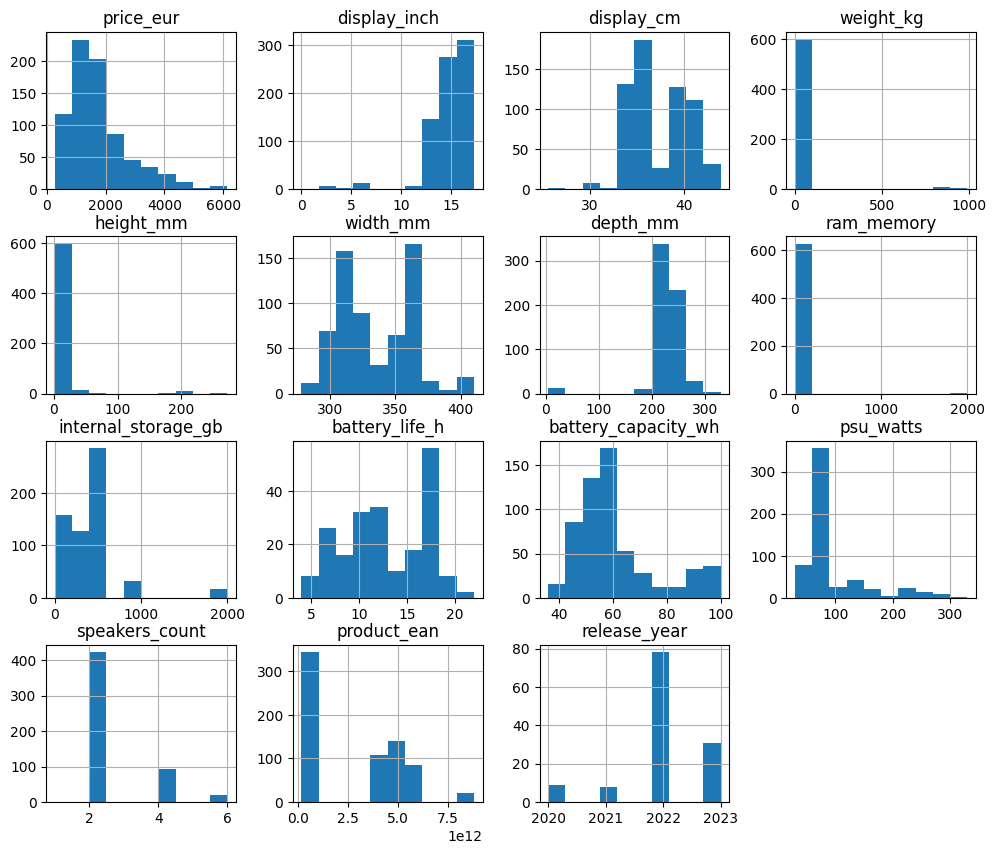

In [ ]:
df.hist(figsize=(12, 10)); # Графическое отображение количественных признаков

In [ ]:
df.info() # Тип признаков и количество значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 764 non-null    object 
 1   price_eur            764 non-null    float64
 2   display_inch         763 non-null    float64
 3   display_cm           628 non-null    float64
 4   display_resolution   628 non-null    object 
 5   display_ratio        454 non-null    object 
 6   weight_kg            616 non-null    float64
 7   height_mm            627 non-null    float64
 8   width_mm             627 non-null    float64
 9   depth_mm             627 non-null    float64
 10  operating_system     626 non-null    object 
 11  cpu_processor        628 non-null    object 
 12  ram_memory           627 non-null    float64
 13  gpu_integrated       617 non-null    object 
 14  gpu_extra            131 non-null    object 
 15  internal_storage_gb  618 non-null    flo

In [ ]:
df.nunique() # Проверяем количество уникальных значений

name                   760
price_eur              723
display_inch            24
display_cm              21
display_resolution      22
display_ratio            3
weight_kg              106
height_mm              106
width_mm               109
depth_mm               130
operating_system        16
cpu_processor           85
ram_memory               7
gpu_integrated          16
gpu_extra               31
internal_storage_gb     11
storage_type             4
battery_life_h          38
battery_capacity_wh     56
psu_watts               26
audio_system             8
speakers_count           4
has_touchscreen          2
keyboard_backlit         2
keyboard_numpad          2
has_webcam               2
has_bluetooth            2
bluetooth_version        8
wifi_standard            3
product_ean            698
product_sku            764
release_year             4
category                 1
dtype: int64

In [ ]:
df.isnull().sum() # Проверяем общее количество пропущенных значений

name                     0
price_eur                0
display_inch             1
display_cm             136
display_resolution     136
display_ratio          310
weight_kg              148
height_mm              137
width_mm               137
depth_mm               137
operating_system       138
cpu_processor          136
ram_memory             137
gpu_integrated         147
gpu_extra              633
internal_storage_gb    146
storage_type           137
battery_life_h         554
battery_capacity_wh    184
psu_watts              188
audio_system           425
speakers_count         226
has_touchscreen          0
keyboard_backlit         0
keyboard_numpad          0
has_webcam               0
has_bluetooth            0
bluetooth_version      224
wifi_standard          137
product_ean             66
product_sku              0
release_year           638
category                 0
dtype: int64

In [ ]:
# Избавимся от признаков 'display_resolution', 'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm',
# 'operating_system', 'battery_life_h', 'psu_watts', 'audio_system', 'speakers_count', 'keyboard_backlit',
# 'keyboard_numpad', 'bluetooth_version', 'wifi_standard', 'product_ean', 'product_sku', 'category'
df.drop(columns=['display_resolution', 'display_ratio', 'weight_kg', 'height_mm', 'width_mm', 'depth_mm', \
                 'operating_system', 'battery_life_h', 'psu_watts', 'audio_system', 'speakers_count', \
                 'keyboard_backlit', 'keyboard_numpad', 'bluetooth_version', 'wifi_standard', 'product_ean', \
                 'product_sku', 'category'], inplace=True)

df.head(n=3) # Выводим 3 строки

,name,price_eur,display_inch,display_cm,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
0,"Apple MacBook Air M1 256GB, Space grau",912.99,13.0,33.8,M1,8.0,Apple GPU,NaN,256.0,SSD,49.9,False,True,True,2020.0
1,MSI Stealth 17 Studio A13VI-013 - Intel Core i...,4680.23,17.3,43.9,i9-13900H,64.0,Intel Iris Xe Graphics,NVIDIA GeForce RTX 4090,4.0,SSD,99.0,False,True,True,NaN
2,MSI Summit E14 FlipEvo A12MT-049 i7-1260P/16GB...,1651.12,14.0,35.6,i7-1260P,16.0,Intel Iris Xe Graphics,NaN,1000.0,SSD,72.0,True,True,True,NaN


In [ ]:
df[df['display_inch'].isnull()] # Проверяем строчку с пропущенным значением display_inch

,name,price_eur,display_inch,display_cm,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
754,Notebook Apple Macbook Pro 14 M2 PRO 10C/16C,3243.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


In [ ]:
def regular_inch(inch: int) -> str:
  """Функция создания регулярного выражения поиска display_inch"""
  return f'({inch}\.[0-9])|({inch}\s)'

display_inch = 14
# Заполним пропущенное значение display_inch = 14 из признака name
df.loc[df['name'].str.contains(regular_inch(display_inch), na=False) & df['display_inch'].isnull(), 'display_inch'] = \
  round(df[(display_inch <= df['display_inch']) & (df['display_inch'] < display_inch + 1)]['display_inch'].mean(), 1)

df['display_inch'].isna().sum() # Проверяем пропущенные значениея display_inch

0

In [ ]:
unique_display_inch = sorted(df['display_inch'].unique())

print(unique_display_inch) # Проверяем уникальные значения display_inch

[0.0, 2.0, 3.0, 5.0, 6.0, 10.1, 11.6, 12.0, 12.4, 13.0, 13.3, 13.4, 13.5, 13.6, 14.0, 14.2, 14.4, 15.0, 15.3, 15.6, 16.0, 16.2, 17.0, 17.3]


In [ ]:
strange_display_inch = unique_display_inch[:5] # display_inch = 0.0, 2.0, 3.0, 5.0, 6.0

df[df['display_inch'].isin(strange_display_inch)] # Проверяем строчки с значениями display_inch = 0.0, 2.0, 3.0, 5.0, 6.0

,name,price_eur,display_inch,display_cm,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
74,Acer Chromebook CB315-4H-C6SD Chrome Cel.N4500...,437.32,6.0,39.6,N4500,8.0,Intel® UHD Graphics,NaN,64.0,Flash,NaN,False,False,True,NaN
88,Lenovo V15 G2-IJL N5100/8GB/512SSD/FHD/matt/W1...,393.58,6.0,39.6,Intel SoC,8.0,Intel® UHD Graphics,NaN,512.0,SSD,38.0,False,True,True,NaN
144,Microsoft Surface Laptop 5 - i5/ 8GB/ 512GB *s...,1418.99,5.0,34.3,i5-1245U,8.0,Intel Iris Xe Graphics,NaN,512.0,SSD,47.4,True,True,True,2022.0
162,"Apple MacBook Air Z124 256GB SSD, grau",1215.41,3.0,33.8,M1,16.0,Apple GPU,NaN,256.0,SSD,49.9,False,True,True,2020.0
189,"Samsung Galaxy Book3 360 39,60cm 15,6Zoll i5-1...",1560.24,6.0,39.6,i5-1340P,8.0,Intel Iris Xe Graphics,NaN,512.0,SSD,68.0,True,True,True,2023.0
247,Microsoft Surface Laptop 5 - i7/16GB/ 512GB *s...,1904.49,5.0,34.3,i7-1265U,16.0,Intel Iris Xe Graphics,NaN,512.0,SSD,47.4,True,True,True,2022.0
299,Microsoft Surface Laptop 5 - i7/16GB/ 512GB *p...,2022.61,0.0,38.1,i7-1265U,16.0,Intel Iris Xe Graphics,NaN,512.0,SSD,47.4,True,True,True,2022.0
322,MSI CreatorPro X17 HX A13VKS-246 i9-13980HX/RT...,5608.88,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
349,Fujitsu Lifebook U7313 FHD i5-1335U 16GB 512SS...,1464.99,3.0,33.8,i5-1335U,16.0,Intel Iris Xe Graphics,NaN,512.0,SSD,60.0,False,True,True,NaN
387,MSI CreatorPro M15 A11UIS-809 i711800H/16GB/1T...,1575.22,6.0,39.6,Intel HM570,16.0,Intel® UHD Graphics,NVIDIA RTX A1000,1000.0,SSD,51.0,False,True,True,NaN


In [ ]:
# Т.к. в строчках 322, 435 и 534 отсутствуют признаки display_cm и в name нет очевидной диаганили экрана и много пропусков, вытащим эти строчки.
df_drop_display_inch = df[df['display_inch'].isin(unique_display_inch[:5]) & df['display_cm'].isnull()]

# удалим строчки 322, 435 и 534 (Копия останется в df_drop_display_inch, возможно, позже ими займемся)
df = df[~df.index.isin(df_drop_display_inch.index)]

In [ ]:
# Проверяем уникальные значения display_cm с признаками display_inch = 0.0, 2.0, 3.0, 5.0, 6.0
strange_display_cm = sorted(df[df['display_inch'].isin(strange_display_inch)]['display_cm'].unique())
strange_display_cm

[29.5, 33.8, 34.3, 34.5, 38.1, 39.6, 43.9]

In [ ]:
# Заполним пропущенное значение display_inch из признака display_cm, т.к. 1 дюйм = 2,54 см
for display_cm in strange_display_cm:
  df.loc[(df['display_inch'].isin(strange_display_inch)) & (df['display_cm'] == display_cm), 'display_inch'] = \
    round(display_cm / 2.54, 1)

print(sorted(df['display_inch'].unique())) # Проверяем уникальные значения display_inch

[10.1, 11.6, 12.0, 12.4, 13.0, 13.3, 13.4, 13.5, 13.6, 14.0, 14.2, 14.4, 15.0, 15.3, 15.6, 16.0, 16.2, 17.0, 17.3]


In [ ]:
df.drop(columns=['display_cm'], inplace=True) # Избавимся от признака display_cm

In [ ]:
df[df['cpu_processor'].isnull()] # Проверяем строчки с пропущенными значениями cpu_processor

,name,price_eur,display_inch,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
30,LENOVO V15 G4 I5-1335U 16GB,737.40,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
41,"Notebook 15.6"" Dell Latitude 5540 I5-1345U 16G...",1117.36,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
45,Lenovo V15 G4 i5-1335U 8/256 SSD FHD W11P,676.77,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
49,"MSI Summit E13 FlipEvo A13MT-233 13.4"" i7-1360...",1998.99,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,Apple MacBook Air Z127 Apple M1 Chip 8C CPU un...,1008.99,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
743,PANASONIC TOUGHBOOK FZ-55 I5-1145G7 VPRO (FZ-5...,2495.05,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
754,Notebook Apple Macbook Pro 14 M2 PRO 10C/16C,3243.67,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
760,Apple MacBook Air Z15T Apple M2 8C CPU/10C GPU...,2182.57,13.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


In [ ]:
# Проверяем уникальные значения cpu_processor
cpu_processor = sorted(df[df['cpu_processor'].notna()]['cpu_processor'].unique())

# Заполним пропущенное значение cpu_processor из признака name
for processor in cpu_processor:
  df.loc[(df['name'].str.contains(processor, case=False, regex=False) &
          df['cpu_processor'].isnull()), 'cpu_processor'] = processor

df[df['cpu_processor'].isnull()] # Проверяем строчки с пропущенными значениями cpu_processor

,name,price_eur,display_inch,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth,release_year
3,Gigabyte GBT AORUS 15 9KF-E3DE383SH i5 W11 144Hz,1087.38,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
70,Lenovo ThinkPad T14s G4 AMD Ryzen 5 Pro 7540U ...,1829.00,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
81,Lenovo ThinkPad P15v AMD Gen3 / R7-6850H / 32G...,1929.98,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
84,Lenovo ThinkPad P15v AMD Gen3 / R7-6850H / 16G...,1742.99,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
92,Lenovo ThinkPad T14s G4 AMD Ryzen 7 Pro 7840U ...,2198.99,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
116,LENOVO ThinkBook 14 G6 AMD Ryzen 5 7530U WUXGA...,818.08,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
126,Acer TM P4 P414-53-759Q 14 i7 W11P 2K IPS,1282.97,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
127,Gigabyte G5 KF-E3DE313SD 16 GB (2x 8 GB,1255.78,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
132,Dell Alienware 15 R7 RYZEN7 16GB,1963.66,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN
135,Lenovo V15 G3 ABA RYZ5-5625U/16GB/512SSD/FHD/m...,618.37,15.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN


In [ ]:
# Вытащим строчки с отсутствующими признаками cpu_processor.
df_drop_cpu_processor = df[df['cpu_processor'].isnull()]

# Удалим строчки с отсутствующими признаками cpu_processor.
df = df[~df.index.isin(df_drop_cpu_processor.index)]

In [ ]:
df.drop(columns=['release_year'], inplace=True) # Избавимся от признака release_year т.к. диапазон маленький, а пропусков много

In [ ]:
# Вытащим пустые строчки.
df_drop_null = df[df['ram_memory'].isnull() | df['internal_storage_gb'].isnull() |
                  df['storage_type'].isnull() | df['battery_capacity_wh'].isnull()]
df_drop_null

,name,price_eur,display_inch,cpu_processor,ram_memory,gpu_integrated,gpu_extra,internal_storage_gb,storage_type,battery_capacity_wh,has_touchscreen,has_webcam,has_bluetooth
27,Fujitsu Lifebook A3511 i5-1135G7 FHD 8GB 256GB...,521.76,15.6,i5-1135G7,8.0,Intel Iris Xe Graphics,NaN,256.0,SSD,NaN,False,True,True
30,LENOVO V15 G4 I5-1335U 16GB,737.40,15.6,i5-1335U,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
34,ACER CHROMEBOOK CP311-3H-K7MM MT8183,384.62,11.6,MediaTek,4.0,ARM Mali-G72 MP3,NaN,64.0,Flash,NaN,True,False,True
38,Acer B4B Extensa 215 EX215-55-58RU i5-1235U/8G...,426.34,15.6,i5-1235U,8.0,Intel Iris Xe Graphics,NaN,256.0,SSD,NaN,False,True,True
41,"Notebook 15.6"" Dell Latitude 5540 I5-1345U 16G...",1117.36,15.6,i5-1345U,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,PANASONIC TOUGHBOOK FZ-55 I5-1145G7 VPRO (FZ-5...,2495.05,14.0,i5-1145G7,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
746,Microsoft Surface Laptop 4 i7 8GB 256GB/2496x1...,1224.99,15.0,i7-1185G7,8.0,Intel Iris Xe Graphics,NaN,256.0,SSD,NaN,True,True,True
754,Notebook Apple Macbook Pro 14 M2 PRO 10C/16C,3243.67,14.0,M2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False
760,Apple MacBook Air Z15T Apple M2 8C CPU/10C GPU...,2182.57,13.6,M2,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [ ]:
# удалим пустые строчки.
df = df[~df.index.isin(df_drop_null.index)]

In [ ]:
# Проверяем уникальные значения internal_storage_gb
ram_memory = sorted(df[df['ram_memory'].notna()]['ram_memory'].unique())
ram_memory

[4.0, 8.0, 16.0, 24.0, 32.0, 64.0, 2000.0]

In [ ]:
# Откорректируем признак ram_memory = 2000.0
for memory in ram_memory[:-2:-1]:
  df.loc[(df['ram_memory'] == memory), 'ram_memory'] = round(memory / 1000.0, 1)

In [ ]:
# Проверяем уникальные значения internal_storage_gb
internal_storage_gb = sorted(df[df['internal_storage_gb'].notna()]['internal_storage_gb'].unique())
internal_storage_gb

[1.0, 2.0, 4.0, 32.0, 64.0, 128.0, 256.0, 500.0, 512.0, 1000.0, 2000.0]

In [ ]:
# Откорректируем признак internal_storage_gb = 1.0, 2.0, 4.0
for storage in internal_storage_gb[:3]:
  df.loc[(df['internal_storage_gb'] == storage), 'internal_storage_gb'] = round(storage * 1000.0, 1)

In [ ]:
# создадим новый признак has_gpu_extra
df['has_gpu_extra'] = df['gpu_extra'].apply(lambda x: 0 if x is np.NaN else 1)

In [ ]:
df['gpu'] = df['gpu_extra']
df.loc[df['gpu'].isnull(),'gpu'] = df['gpu_integrated']

# Удаляем лишние признаки.
df = df.drop(columns=['gpu_integrated', 'gpu_extra', 'name', 'gpu', 'cpu_processor'])

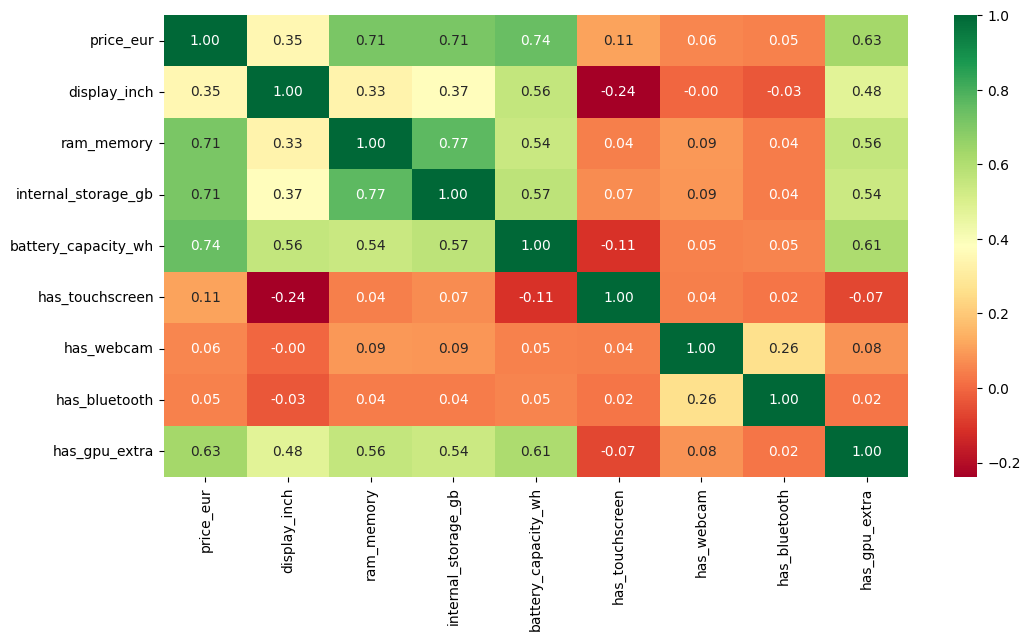

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f') # Корреляция признаков
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Выберем признак 'has_gpu_extra'

In [ ]:
# Преобразование категориальных признаков
features = ['display_inch', 'storage_type', 'has_touchscreen', 'has_webcam', 'has_bluetooth']
dums = []
for i, feature in enumerate(features):
    dums.append(pd.get_dummies(df[feature], prefix = feature))

frames = [df, *dums]
df = pd.concat(frames, axis = 1)

df = df.drop(columns = features)
df.head()

,price_eur,ram_memory,internal_storage_gb,battery_capacity_wh,has_gpu_extra,display_inch_11.6,display_inch_12.0,display_inch_12.4,display_inch_13.0,display_inch_13.3,display_inch_13.4,display_inch_13.5,display_inch_13.6,display_inch_14.0,display_inch_14.2,display_inch_14.4,display_inch_15.0,display_inch_15.3,display_inch_15.6,display_inch_16.0,display_inch_16.2,display_inch_17.0,display_inch_17.3,storage_type_Flash,storage_type_HDD,storage_type_SSD,storage_type_eMMC,has_touchscreen_False,has_touchscreen_True,has_webcam_False,has_webcam_True,has_bluetooth_False,has_bluetooth_True
0,912.99,8.0,256.0,49.9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1
1,4680.23,64.0,4000.0,99.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1
2,1651.12,16.0,1000.0,72.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1
4,354.97,8.0,256.0,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1
5,1997.16,16.0,512.0,57.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
# Разбиение данных с использованием train_test_split и масштабирование
y = df['has_gpu_extra']
X = df.drop(columns=['has_gpu_extra'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((400, 32), (172, 32), (400,), (172,))

In [ ]:
# Поиск по сетке с помощью GridSearchCV и обучение моделей.
tuned_models = {}

for name, model in models.items():
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    tuned_models[name] = grid_search.best_estimator_
    preds = tuned_models[name].predict(X_test_scaled)
    accuracy = accuracy_score(y_test, preds)
    print(f'{name} accuracy: {accuracy}')
    print(f'{name} best_estimator: {tuned_models[name]}')

Logistic Regression accuracy: 0.9069767441860465
Logistic Regression best_estimator: LogisticRegression(C=0.1, solver='liblinear')
SVM accuracy: 0.8953488372093024
SVM best_estimator: SVC(C=0.1, kernel='linear')
KNN accuracy: 0.8662790697674418
KNN best_estimator: KNeighborsClassifier(n_neighbors=9)
Naive Bayes accuracy: 0.5116279069767442
Naive Bayes best_estimator: GaussianNB()
Decision Tree accuracy: 0.877906976744186
Decision Tree best_estimator: DecisionTreeClassifier(max_depth=5, min_samples_split=4)
Logistic Regression Custom accuracy: 0.9069767441860465
Logistic Regression Custom best_estimator: LogisticRegressionCustom(lr=0.1)
SVM Custom accuracy: 0.4186046511627907
SVM Custom best_estimator: SVMCustom(C=100)


Logistic Regression optimal number of features: 16
Logistic Regression selected features: ['price_eur', 'ram_memory', 'internal_storage_gb', 'battery_capacity_wh', 'display_inch_13.0', 'display_inch_13.3', 'display_inch_14.0', 'display_inch_14.2', 'display_inch_14.4', 'display_inch_15.3', 'display_inch_15.6', 'display_inch_16.0', 'display_inch_16.2', 'storage_type_HDD', 'has_touchscreen_True', 'has_webcam_True']

Decision Tree optimal number of features: 4
Decision Tree selected features: ['price_eur', 'ram_memory', 'battery_capacity_wh', 'display_inch_14.0']

Logistic Regression Custom optimal number of features: 9
Logistic Regression Custom selected features: ['price_eur', 'ram_memory', 'battery_capacity_wh', 'display_inch_13.0', 'display_inch_13.3', 'display_inch_15.6', 'display_inch_16.0', 'display_inch_16.2', 'storage_type_HDD']



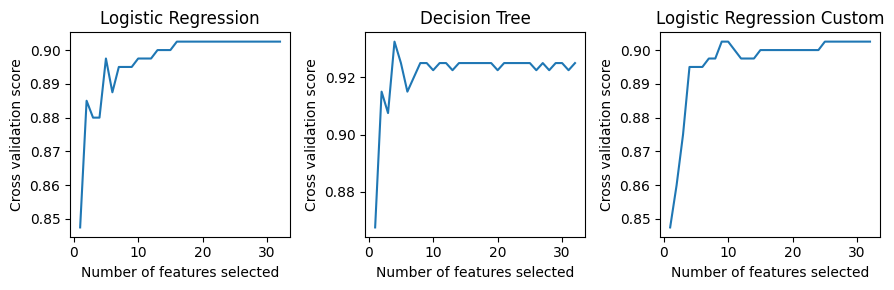

In [ ]:
# Выбор оптимального количества признаков кросс-валидацией с помощью RFECV
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes = axes.flatten()

for i, name in enumerate(['Logistic Regression', 'Decision Tree', 'Logistic Regression Custom']):
    rfecv = RFECV(estimator=tuned_models[name], step=1, cv=5, scoring='accuracy')
    rfecv.fit(X_train_scaled, y_train)

    print(f'{name} optimal number of features: {rfecv.n_features_}')
    print(f'{name} selected features: {list(X_train.columns[rfecv.support_])}\n')

    axes[i].plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Number of features selected')
    axes[i].set_ylabel('Cross validation score')

plt.tight_layout()
plt.show()

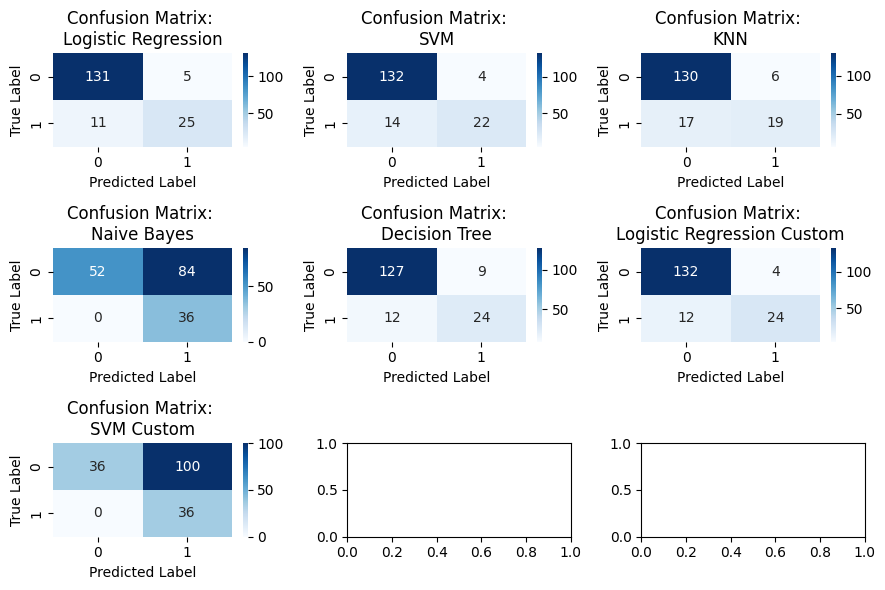

In [ ]:
# Confusion Matrix
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 6))
axes = axes.flatten()

for i, (model_name, model) in enumerate(list(tuned_models.items())):

    y_pred = model.predict(X_test_scaled)

    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix: \n{model_name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

Лучший результат по прогнозированию наличия дискретной видеокарты показала библиотечная реализация 'Logistic Regression'.